In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv("reviews with normalized scores and lengths no stopwords.csv")
df.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,useful,user_id,fear_score,...,surprise_score,disgust_score,fear_normalized,happy_normalized,sad_normalized,anger_normalized,neutral_normalized,surprise_normalized,disgust_normalized,review_length
0,84442,XH2TZmZt6gzHHpjqk8C6pg,1,2009-05-26 13:42:02,3,rtQJU6GHxnxsXKBspKzWaA,5,6,lJzgOpVS1pmb2UW7j2GkDg,2.405523,...,2.925512,1.423982,0.154263,0.194019,0.164339,0.143937,0.064513,0.187610,0.091318,307
1,75795,yNVcnSaMSrTmjJBMrHTy9w,2,2012-06-01 18:22:23,1,wU-awV0uGkZdjnIFsgoTQA,4,5,8iqGB11mHwCTLOOHkqnqmQ,0.532827,...,0.549298,0.138426,0.200740,0.193448,0.136829,0.152236,0.057650,0.206945,0.052151,88
2,42057,zk3AimWhuz0EZsNgIddKdg,0,2018-05-19 16:05:50,0,WBE8cGKMIJggpXRA4KTaog,2,0,qFk5mtbEqpRgg2v2HRoryQ,0.365300,...,0.293360,0.315442,0.132739,0.322269,0.110795,0.165409,0.047569,0.106598,0.114622,101
3,25891,MN0Pd66285k2k9lkpEtptA,0,2017-03-15 20:01:16,0,_NcurWksF9tSwXK9Mq3GIA,1,0,D4xs1lDiug7hU_NfPnJxpQ,1.301386,...,1.360330,0.515131,0.176703,0.162737,0.137485,0.207375,0.061050,0.184706,0.069945,195
4,51127,N9oZ9GDPf65x6zv7fsKJvA,0,2012-11-07 23:02:55,1,bQ1zd9OOjNwMJexVp2jZSA,3,2,cuVrNmt7_WtBn1uz5L_p0g,0.148931,...,0.425446,0.080027,0.104764,0.193086,0.117864,0.185288,0.043428,0.299275,0.056294,27


In [2]:
import statsmodels.api as sm
from scipy import stats

X = pd.DataFrame(df, columns = ["fear_normalized", "happy_normalized", "sad_normalized", "anger_normalized",\
                                "neutral_normalized", "surprise_normalized","disgust_normalized"])
Y = df['stars']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

est = sm.OLS(Y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.189
Date:                Wed, 06 Nov 2019   Prob (F-statistic):            0.00132
Time:                        14:52:25   Log-Likelihood:                -111.48
No. Observations:                  70   AIC:                             237.0
Df Residuals:                      63   BIC:                             252.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
fear_normalized         1.7057    

In [3]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, Y_train)
sgd_clf.predict(X_train)

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int64)

In [4]:
Y_train.ravel()

array([5, 2, 4, 5, 3, 5, 5, 4, 1, 5, 5, 4, 3, 1, 1, 5, 3, 5, 1, 3, 4, 5,
       4, 4, 5, 2, 4, 5, 2, 3, 1, 5, 5, 3, 5, 3, 4, 1, 4, 5, 5, 3, 5, 5,
       5, 4, 5, 5, 1, 5, 3, 4, 5, 1, 3, 5, 5, 5, 3, 5, 5, 5, 1, 3, 5, 5,
       5, 5, 5, 5], dtype=int64)

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train, cv = 3, scoring = "accuracy")

array([0.125     , 0.5       , 0.13636364])

In [6]:
sgd_clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [7]:
sgd_clf.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, Y_train)
lda_clf.predict(X_train)

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([5, 5, 5, 5, 5, 3, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 3, 5, 5, 5, 3, 5,
       4, 5, 5, 2, 3, 5, 3, 3, 5, 5, 3, 3, 5, 5, 5, 4, 3, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 1, 4, 4, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5], dtype=int64)

In [7]:
Y_train.ravel()

array([5, 2, 4, 5, 3, 5, 5, 4, 1, 5, 5, 4, 3, 1, 1, 5, 3, 5, 1, 3, 4, 5,
       4, 4, 5, 2, 4, 5, 2, 3, 1, 5, 5, 3, 5, 3, 4, 1, 4, 5, 5, 3, 5, 5,
       5, 4, 5, 5, 1, 5, 3, 4, 5, 1, 3, 5, 5, 5, 3, 5, 5, 5, 1, 3, 5, 5,
       5, 5, 5, 5], dtype=int64)

In [8]:
cross_val_score(lda_clf, X_train, Y_train, cv = 3, scoring = "accuracy")

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([0.375, 0.625, 0.5  ])

[Text(0.5,0,'fear_normalized'),
 Text(1.5,0,'happy_normalized'),
 Text(2.5,0,'sad_normalized'),
 Text(3.5,0,'anger_normalized'),
 Text(4.5,0,'neutral_normalized'),
 Text(5.5,0,'surprise_normalized'),
 Text(6.5,0,'disgust_normalized')]

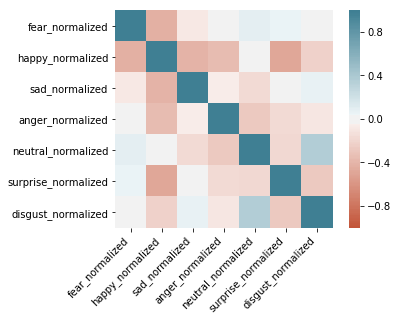

In [9]:
import seaborn as sns
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

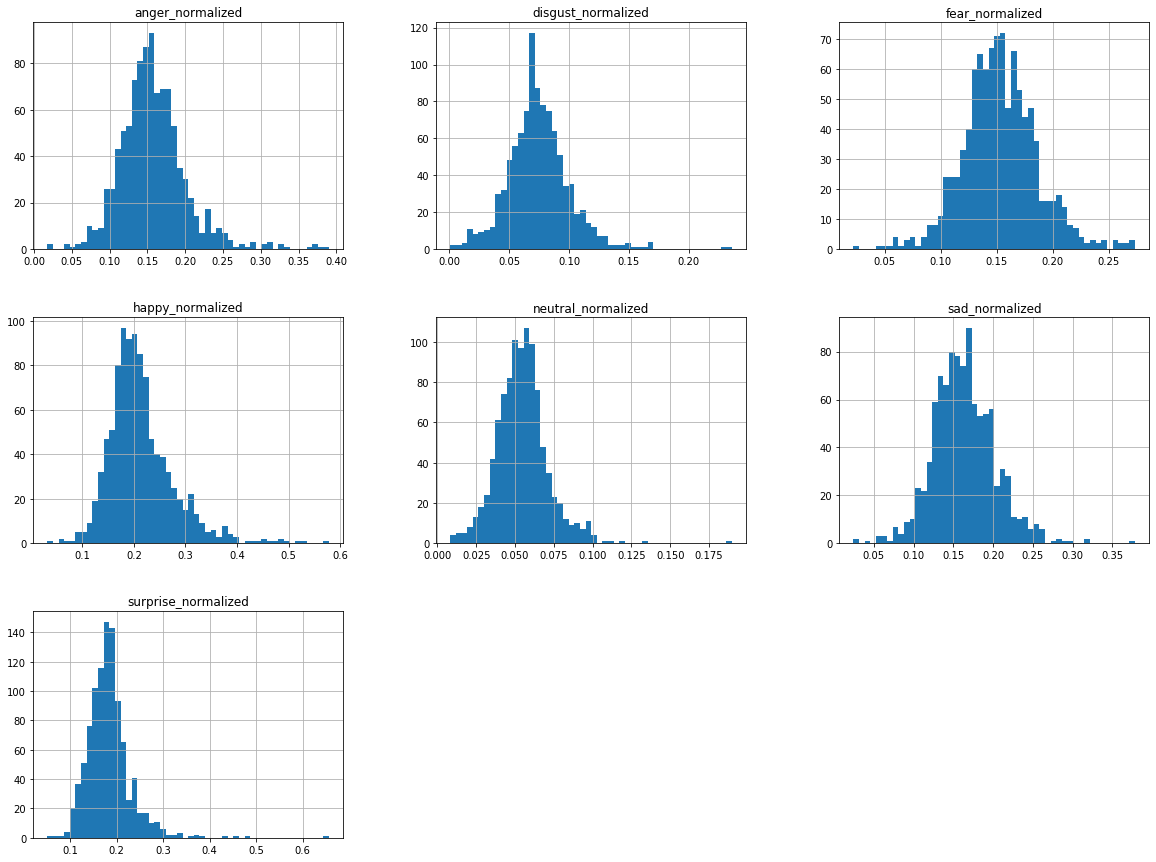

In [12]:
import matplotlib.pyplot as plt
X.hist(bins = 50, figsize = (20, 15))
plt.show()

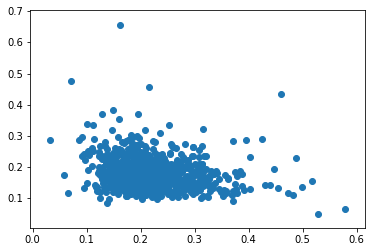

In [13]:
plt.scatter(X["happy_normalized"], X["surprise_normalized"])
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [11]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting = "soft")
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('LogisticRegression', 0.43333333333333335)
('RandomForestClassifier', 0.26666666666666666)
('SVC', 0.43333333333333335)
('VotingClassifier', 0.43333333333333335)


In [12]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting = "hard")
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

('LogisticRegression', 0.43333333333333335)
('RandomForestClassifier', 0.3)
('SVC', 0.43333333333333335)
('VotingClassifier', 0.43333333333333335)


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"solver": ["svd", "lsqr"], "tol": [0, .00000001, .0000001, .00001, .0001, .001, .01, .1]}]

grid_search = GridSearchCV(lda_clf, param_grid, cv = 3, verbose=3, n_jobs=-1)

grid_search.fit(X_train, Y_train)

grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   19.1s finished
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'solver': 'svd', 'tol': 1e-08}

In [14]:
lda_clf = LinearDiscriminantAnalysis(solver="svd", tol=.00000001)
lda_clf.fit(X_train, Y_train)
np.mean(cross_val_score(lda_clf, X_train, Y_train, cv = 3, scoring = "accuracy"))

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5

C:\Users\Thomas\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


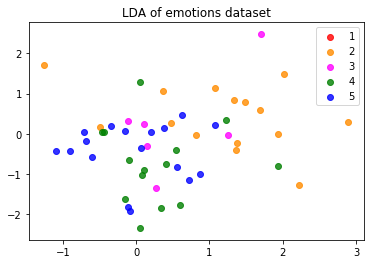

In [15]:
import matplotlib.pyplot as plt

target_names = sgd_clf.classes_

colors = ['red', 'darkorange', "magenta",  "green", "blue"]
lw = 2

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of emotions dataset')

plt.show()